In [237]:
import numpy as np
import cvxpy as cvx
import matplotlib.pyplot as plt

## 4.17

#### Value of lower bound from LP Relaxation

In [333]:

np.random.seed(0)
m, n = 300, 100
A = np.random.rand(m, n)
b = A.dot(np.ones(n)) / 2
c = -np.random.rand(n)


In [334]:
x =  cvx.Variable(n)
constraints = [A @ x - b <= 0, x >= 0, x <= 1]
obj = cvx.Minimize(c.T @ x)
prob = cvx.Problem(obj, constraints)
prob.solve()
print("The optimzer is:", x.value)
print("The lower bound L obtained from the optimal value of the relaxed LP is:", prob.value)
#print("p*= %2f, with x =%2f "% (prob.value, x.value))

The optimzer is: [1.00000000e+00 9.50418018e-01 4.07316776e-11 1.00000000e+00
 8.10921843e-01 1.00000000e+00 1.00000000e+00 7.41313700e-01
 3.73635777e-11 5.17668122e-01 9.47947355e-10 3.34130160e-11
 1.14949538e-10 1.41323354e-10 1.00000000e+00 1.00000000e+00
 8.98098282e-11 9.61766086e-02 1.00000000e+00 4.54701350e-11
 2.68037809e-11 4.79160944e-09 1.00000000e+00 2.31233759e-01
 1.00000000e+00 2.25907466e-11 1.00000000e+00 1.00000000e+00
 6.48920517e-11 4.77922295e-11 1.00767681e-10 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 2.02647871e-01
 6.61881067e-11 1.00000000e+00 2.33345467e-11 6.51236551e-11
 8.85585983e-01 8.84938130e-01 1.00000000e+00 3.76256498e-11
 1.00000000e+00 2.52537729e-11 1.47877677e-10 1.34420360e-10
 1.11451990e-10 1.46712451e-10 6.03415693e-01 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.73349566e-10
 1.00000000e+00 9.70070365e-11 1.00000000e+00 3.59908418e-01
 1.72207487e-11 2.72159554e-11 1.00000000e+00 2.71236406e-11
 1.0000

#### Thresholding and Maximum Constraint Violation 

In [335]:
t_vals = np.linspace(0,1, 100)
bool_approx_tens = dict()
obj_val_tens = dict()
max_violation_tens = dict()

for t in t_vals:
    bool_approx = np.array(x.value >= t).astype(int)
    obj_val = bool_approx @ c
    max_violation = np.max(A @ bool_approx - b)
    bool_approx_tens[t], obj_val_tens[t], max_violation_tens[t]  = bool_approx, obj_val, max_violation

In [336]:
t_values = np.array(list(obj_val_tens.keys()))
objective_values = np.array(list(obj_val_tens.values()))
max_violations = np.array([v for v in max_violation_tens.values()])
feasibility = np.array([np.all(v <= 0) for v in max_violation_tens.values()])


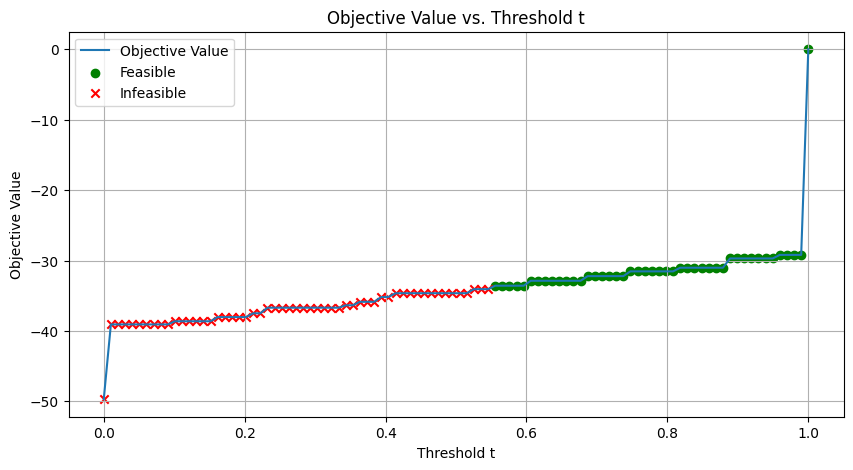

In [337]:

plt.figure(figsize=(10, 5))
plt.plot(t_values, objective_values, label="Objective Value", linestyle='-')

plt.scatter(t_values[feasibility], objective_values[feasibility], color='green', label="Feasible", marker='o')
plt.scatter(t_values[~feasibility], objective_values[~feasibility], color='red', label="Infeasible", marker='x')

plt.xlabel("Threshold t")
plt.ylabel("Objective Value")
plt.title("Objective Value vs. Threshold t")
plt.legend()
plt.grid(True)
plt.show()


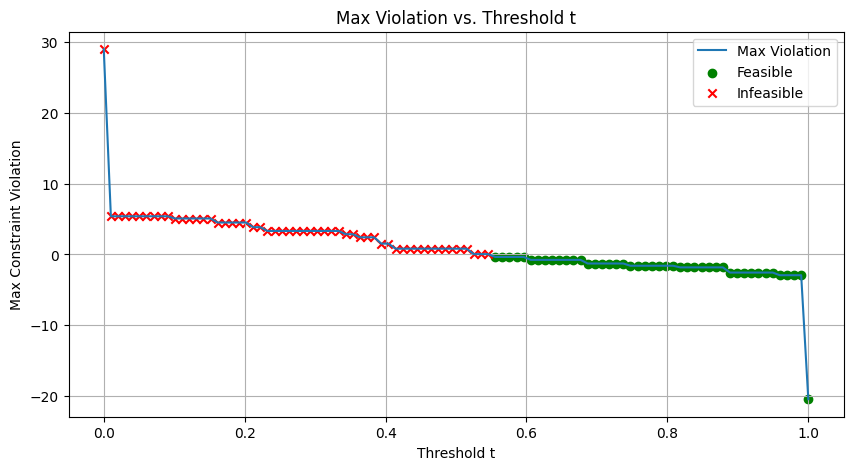

In [338]:

plt.figure(figsize=(10, 5))
plt.plot(t_values, max_violations, label="Max Violation", linestyle='-')

plt.scatter(t_values[feasibility], max_violations[feasibility], color='green', label="Feasible", marker='o')
plt.scatter(t_values[~feasibility], max_violations[~feasibility], color='red', label="Infeasible", marker='x')


plt.xlabel("Threshold t")
plt.ylabel("Max Constraint Violation")
plt.title("Max Violation vs. Threshold t")
plt.legend()
plt.grid(True)
plt.show()

#### Finding feasible t and noting gap between upper and lower bound. 

In [339]:
prob.value

np.float64(-34.41722426062947)

In [340]:
t_star = np.min(t_values[feasibility])
print("The upper bound U obtained from thresholding on the the relaxed LP is:", obj_val_tens[t_star])
print("The gap betweeen upper bound U and lower bound L on p* is :", obj_val_tens[t_star] - prob.value)

print(obj_val_tens[t_star])
print(prob.value)

The upper bound U obtained from thresholding on the the relaxed LP is: -33.57725134530702
The gap betweeen upper bound U and lower bound L on p* is : 0.8399729153224484
-33.57725134530702
-34.41722426062947


## 5.1


In [332]:
x = cvx.Variable(2)
u1 = -2
u2 = -3
A =  np.array([[1,-1/2], [-1/2,2]])
a = [-1,0]
C = np.array([[1,2], [1,-4],[5,76]])
b_values = [u1, u2, 1]


constraints = [C@x-b_values <=0]
obj = cvx.Minimize(cvx.quad_form(x, A) + a@x)
prob = cvx.Problem(obj, constraints)

p_star = prob.solve()
lambda_star = [constraint.dual_value for constraint in constraints]
x_star = x.value

In [263]:
#Save p_star from part (a)
p_star_a = p_star
lambda_star_a = lambda_star[0]
print("Optimal value of the primal objective:", p_star, "\nOptimal value of the dual variables:",  lambda_star,"\nOptimal value of the primal variables:", x_star)

Optimal value of the primal objective: 8.222222222222221 
Optimal value of the dual variables: [array([2.74774125, 2.88523345, 0.04007173])] 
Optimal value of the primal variables: [-2.33333333  0.16666667]


In [264]:
# Verify KKT conditions
# Stationarity: ∇f(x*) + C.T * λ* = 0
grad_f_x_star = 2 * A @ x_star + a  # Gradient of objective function
kkt_stationarity = grad_f_x_star + C.T @ lambda_star[0]

# Complementary slackness: λ⋆i (Ci * x⋆ - bi) = 0 for all i
slack_values = C @ x_star - b_values
complementary_slackness = lambda_star[0] * slack_values

# Primal feasibility: C * x⋆ - b_values ≤ 0
primal_feasibility = np.all(slack_values <= 10**-14)

# Dual feasibility: λ⋆ ≥ 0
dual_feasibility = np.all(np.array(lambda_star[0]) >= 0)


In [265]:
print("Stationarity: ∇f(x*) + C.T * λ* = 0:", kkt_stationarity, "\nComplementary slackness: λ⋆i (Ci * x⋆ - bi) = 0 for all i:", complementary_slackness,"\nPrimal feasibility: C * x⋆ - b_values ≤ 0",primal_feasibility,"\nDual feasibility: λ⋆ ≥ 0", dual_feasibility )

Stationarity: ∇f(x*) + C.T * λ* = 0: [ 8.8817842e-16 -8.8817842e-16] 
Complementary slackness: λ⋆i (Ci * x⋆ - bi) = 0 for all i: [1.22024224e-15 0.00000000e+00 1.42363375e-16] 
Primal feasibility: C * x⋆ - b_values ≤ 0 True 
Dual feasibility: λ⋆ ≥ 0 True


In [270]:
combs_results = np.zeros((3,3))
combs_pred = np.zeros((3,3))
delta_values = [-0.1, 0, 0.1]
for i_idx, i in enumerate(delta_values):
    for j_idx, j in enumerate(delta_values):
        u1_new = u1 + i
        u2_new = u2 + j
        b_values = [u1_new, u2_new, 1]

        constraints = [C@x-b_values <=0]
        obj = cvx.Minimize(cvx.quad_form(x, A) + a@x)
        prob = cvx.Problem(obj, constraints)

        p_star = prob.solve()
        p_pred = p_star_a - lambda_star_a[:2].T @ np.array([i, j])
        combs_results[i_idx,j_idx] = p_star
        combs_pred[i_idx,j_idx] = p_pred
        
        

In [271]:
combs_results

array([[8.81555556, 8.565     , 8.31888889],
       [8.70638672, 8.22222222, 7.98      ],
       [8.70638672, 8.22222222, 7.75152561]])

In [272]:
combs_pred

array([[8.78551969, 8.49699635, 8.208473  ],
       [8.51074557, 8.22222222, 7.93369888],
       [8.23597144, 7.9474481 , 7.65892475]])

## 20.9

### 20.9(b)

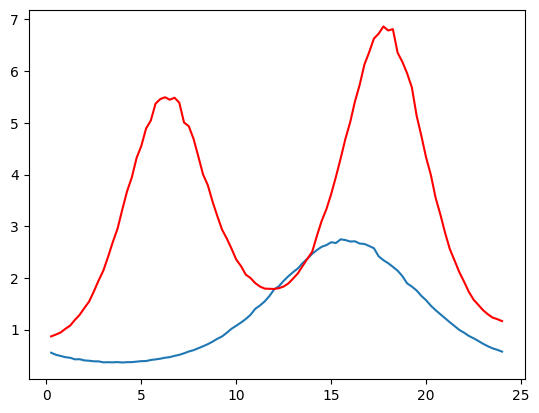

In [363]:


np.random.seed(1)

T = 96
t = np.linspace(1, T, num=T).reshape(T,1)
p = np.exp(-np.cos((t-15)*2*np.pi/T)+0.01*np.random.randn(T,1))
p = np.array([i[0] for i in p])
u = 2*np.exp(-0.6*np.cos((t+40)*np.pi/T) - 0.7*np.cos(t*4*np.pi/T)+0.01*np.random.randn(T,1))
u = np.array([i[0] for i in u])

plt.figure(1)
plt.plot(t/4, p); 
plt.plot(t/4, u, 'r'); 
plt.show()

In [395]:
M = np.zeros((T, T))
M[1:, 1:] = np.eye(T-1, k=1)
M[0, 1] = 1
M[-1,0] = 1

In [396]:
I = np.identity(T) 
(M-I)

array([[-1.,  1.,  0., ...,  0.,  0.,  0.],
       [ 0., -1.,  1., ...,  0.,  0.,  0.],
       [ 0.,  0., -1., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ..., -1.,  1.,  0.],
       [ 0.,  0.,  0., ...,  0., -1.,  1.],
       [ 1.,  0.,  0., ...,  0.,  0., -1.]])

In [404]:
Q, C, D = 35, 3, 3


c = cvx.Variable(T)
q = cvx.Variable(T)


constraints = [u + c >= 0 , q - Q*np.ones(T) <= 0, -q <=0, c - C*np.ones(T) <= 0, -c - D*np.ones(T) <= 0, (M-I) @ q  - c ==0 ]
obj = cvx.Minimize(p @ (c+u))
prob = cvx.Problem(obj, constraints)

p_star = prob.solve()
x_star = x.value

In [405]:
p_star

np.float64(379.4109771623206)

In [406]:
x_star

array([ 0.14623315,  0.07422328, -0.07953149,  0.04215249, -0.10817519,
        0.09336979,  0.02553522,  0.15185911,  0.08248657, -0.01020142,
       -0.00619735,  0.05428674,  0.14177562,  0.11063702, -0.17354041,
       -0.02324452, -0.09910962,  0.06588429,  0.12203127,  0.38952545])

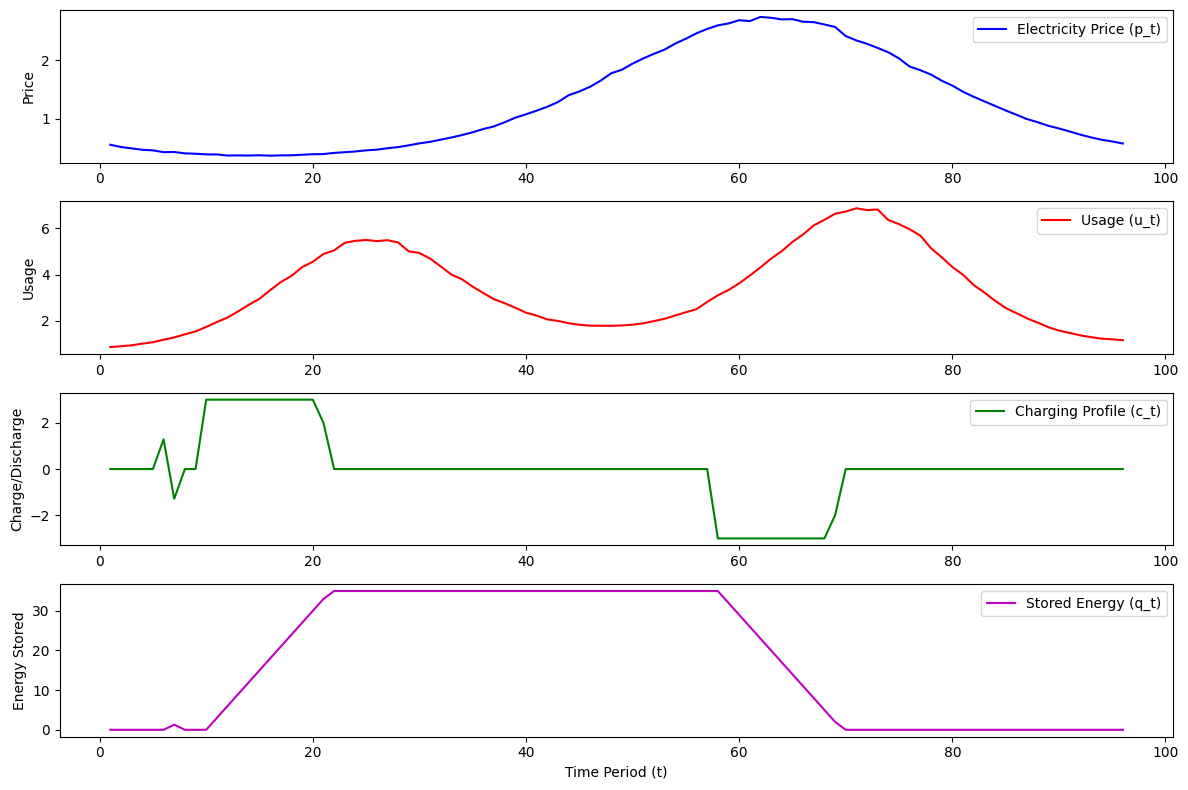

In [407]:

c_star = c.value 
q_star = q.value

plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(t, p, label="Electricity Price (p_t)", color='b')
plt.ylabel("Price")
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(t, u, label="Usage (u_t)", color='r')
plt.ylabel("Usage")
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(t, c_star, label="Charging Profile (c_t)", color='g')
plt.ylabel("Charge/Discharge")
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(t, q_star, label="Stored Energy (q_t)", color='m')
plt.xlabel("Time Period (t)")
plt.ylabel("Energy Stored")
plt.legend()

plt.tight_layout()
plt.show()


### 20.9(c)

In [410]:
Q_values = np.linspace(0, 150, 100)  

costs_C3 = []
costs_C1 = []

for Q in Q_values:
    for C, D, cost_list in [(3, 3, costs_C3), (1, 1, costs_C1)]:
        c = cvx.Variable(T)
        q = cvx.Variable(T)
        
        constraints = [
            q - Q * np.ones(T) <= 0,
            -q <= 0,    
            c - C * np.ones(T) <= 0,   
            -c - D * np.ones(T) <= 0,  
            ( M-I) @ q - c == 0,   
             
        ]

        obj = cvx.Minimize(p.T @ (u + c))  

        prob = cvx.Problem(obj, constraints)
        p_star = prob.solve()

        cost_list.append(p_star)


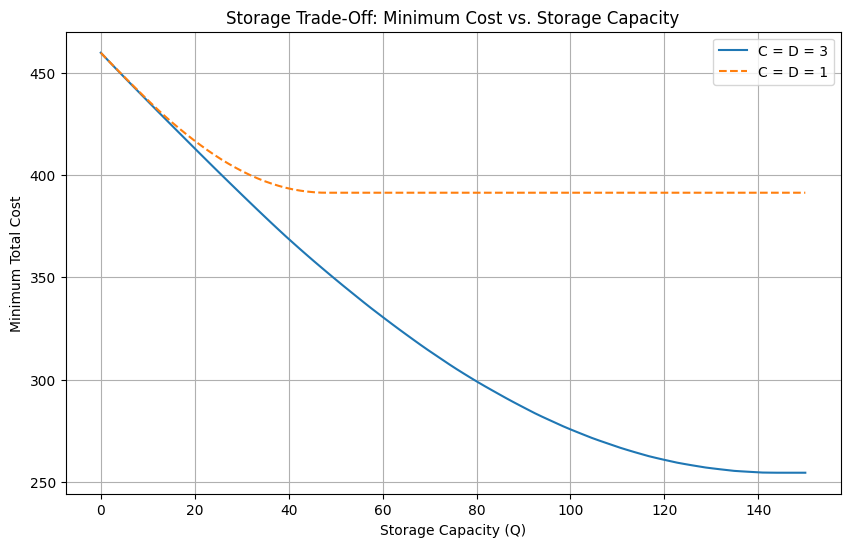

In [412]:
plt.figure(figsize=(10, 6))
plt.plot(Q_values, costs_C3, label="C = D = 3", linestyle='-')
plt.plot(Q_values, costs_C1, label="C = D = 1", linestyle='--')

plt.xlabel("Storage Capacity (Q)")
plt.ylabel("Minimum Total Cost")
plt.title("Storage Trade-Off: Minimum Cost vs. Storage Capacity")
plt.legend()
plt.grid()
plt.show()

## 17.3

#### (a)

In [342]:

np.random.seed(1)
n = 20
pbar = np.ones(n)*.03 + np.r_[np.random.rand(n-1), np.zeros(1)]*.12
S = np.random.randn(n, n)
S = S.T @ S
S = S/max(np.abs(np.diag(S)))*.2
S[:, -1] = np.zeros(n)
S[-1, :] = np.zeros(n).T
x_unif = np.ones(n)/n
x_unit = x_unif

In [353]:
#Uniform portfolio Risk:
print("The risk of the uniform portfolio is : ", np.sqrt(x_unif.T @ S @ x_unif)*100)

The risk of the uniform portfolio is :  6.661078122826401


In [354]:
#No Additional Constraints
x = cvx.Variable(n)
constraints = [cvx.sum(x) == 1, pbar @ x == pbar @ x_unif ]
obj = cvx.Minimize(cvx.quad_form(x, S))
prob = cvx.Problem(obj, constraints)

prob.solve()
print("Minimum Risk of portfolio with same expected return as uniform portfolio and \nwith : no Additional Constraints is ", np.sqrt(prob.value)*100)

Minimum Risk of portfolio with same expected return as uniform portfolio and 
with : no Additional Constraints is  0.9032182720194974


In [355]:
#Long only

x= cvx.Variable(n)
constraints = [cvx.sum(x) == 1, pbar @ x == pbar @ x_unif, x>=0 ]
obj = cvx.Minimize(cvx.quad_form(x, S))
prob = cvx.Problem(obj, constraints)

prob.solve()
print("Minimum Risk of portfolio with same expected return as uniform portfolio and \nwith : long only is ",np.sqrt(prob.value)*100)

Minimum Risk of portfolio with same expected return as uniform portfolio and 
with : long only is  3.9500474014061973


In [356]:
#  Limit on total short position

x = cvx.Variable(n)
obj = cvx.Minimize(cvx.quad_form(x, S))
constraints = [cvx.sum(x) == 1, pbar @ x == pbar @ x_unif, cvx.sum(cvx.pos(-x)) <=0.5 ]
prob = cvx.Problem(obj, constraints)
prob.solve()
print("Minimum Risk of portfolio with same expected return as uniform portfolio and \nwith : Limit on total short position is ",np.sqrt(prob.value)*100)

Minimum Risk of portfolio with same expected return as uniform portfolio and 
with : Limit on total short position is  1.4973496987308916


#### (b)

In [359]:
N = 200
gammas = np.linspace(0, 10, N)
returns_long_only = np.zeros(N)
risk_long_only = np.zeros(N)
returns_short_limited = np.zeros(N)
risk_short_limited = np.zeros(N)

for i, gamma in enumerate(gammas):
    x_long_only = cvx.Variable(n)
    obj = cvx.Maximize(pbar @ x_long_only - gamma * cvx.quad_form(x_long_only, S))
    constraints = [cvx.sum(x_long_only) == 1, x_long_only >= 0]
    prob = cvx.Problem(obj, constraints)
    prob.solve()
    returns_long_only[i] = pbar @ x_long_only.value
    risk_long_only[i] = np.sqrt(x_long_only.value.T @ S @ x_long_only.value)

    x_short_limited = cvx.Variable(n)
    obj = cvx.Maximize(pbar @ x_short_limited - gamma * cvx.quad_form(x_short_limited, S))
    constraints = [cvx.sum(x_short_limited) == 1, cvx.sum(cvx.pos(-x_short_limited)) <= 0.5]
    prob = cvx.Problem(obj, constraints)
    prob.solve()
    returns_short_limited[i] = pbar @ x_short_limited.value
    risk_short_limited[i] = np.sqrt(x_short_limited.value.T @ S @ x_short_limited.value)


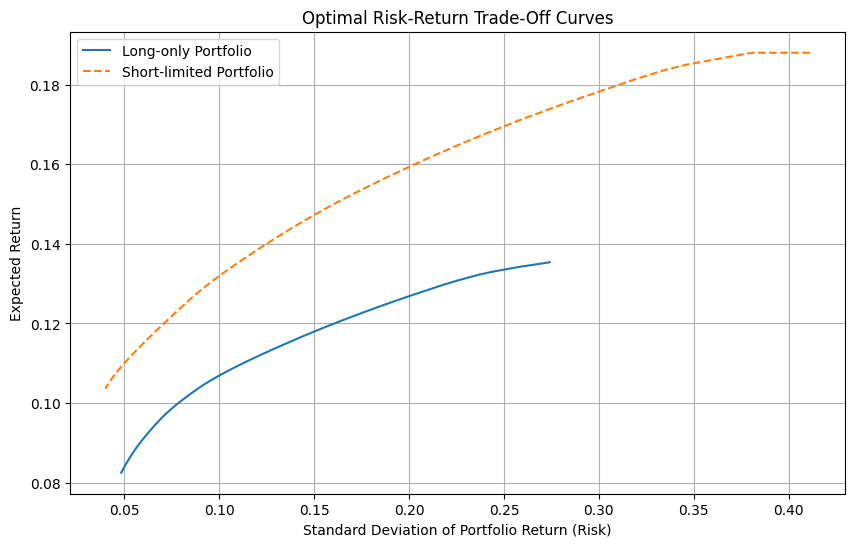

In [360]:

plt.figure(figsize=(10, 6))
plt.plot(risk_long_only, returns_long_only, label="Long-only Portfolio", linestyle="-")
plt.plot(risk_short_limited, returns_short_limited, label="Short-limited Portfolio", linestyle="--")

plt.xlabel("Standard Deviation of Portfolio Return (Risk)")
plt.ylabel("Expected Return")
plt.title("Optimal Risk-Return Trade-Off Curves")
plt.legend()
plt.grid()
plt.show()
